# Network Motifs 

Below are few "toy" examples demonstrating how to use the package for both counting network motifs (triads) and visualizing the results.

In [1]:
# # Install packages (uncomment if necessary, e.g., for Google Colab)
# !pip install netsci

In [2]:
import netsci.models.random as nsr
import netsci.metrics.motifs as nsm
import netsci.visualization as nsv

import matplotlib.pyplot as plt


plt.rcParams.update(
    {
        "figure.dpi": 144,
        "figure.figsize": (6, 3),
    }
)

## Counting motif frequencies

First, let's generate a sample adjacency matrix using the [Erdős–Rényi model](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). 

In [3]:
n = 500  # The number of nodes
p = 0.1  # The probability for a connection (or, "sparsity")

A = nsr.erdos_renyi(n, p)

Count all 16 triplet motifs using a naïve brute-force algorithm (complexity of O($n^3$)).

In [4]:
nsm.motifs(A, algorithm="brute-force")

array([10887486,  7395588,   414110,   834343,   417953,   418808,
          94146,    93650,    93137,    31339,     5369,    10758,
           5290,     5301,     1202,       20])

A more efficient counting, but only for the 13 connected triplets, is also implemented (using the algorithm given in [Itzhack *et al.* (2007)](https://doi.org/10.1016/j.physa.2007.02.102)).

In [5]:
f = nsm.motifs(A)
print(f)

[    -1     -1     -1 834343 417953 418808  94146  93650  93137  31339
   5369  10758   5290   5301   1202     20]


## Simple plotting

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<Axes: >, <Axes: >]

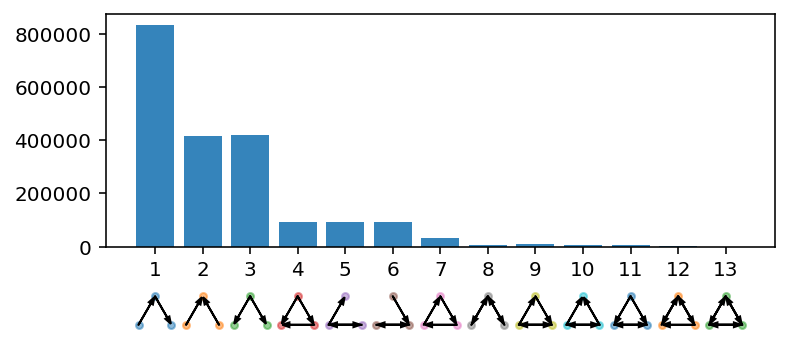

In [6]:
nsv.bar_motifs(f)

The plotted order is by the convention as in [Gal *et al.* (2017)](http://dx.doi.org/10.1038/nn.4576). We can also use different order (see below).

To get the patterns explicitely:

In [7]:
nsm.triad_patterns()

[array([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 array([[0, 1, 0],
        [0, 0, 0],
        [0, 0, 0]]),
 array([[0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]]),
 array([[0, 1, 0],
        [0, 0, 0],
        [1, 0, 0]]),
 array([[0, 0, 0],
        [1, 0, 0],
        [1, 0, 0]]),
 array([[0, 1, 1],
        [0, 0, 0],
        [0, 0, 0]]),
 array([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]]),
 array([[0, 0, 0],
        [0, 0, 1],
        [1, 1, 0]]),
 array([[0, 1, 0],
        [0, 0, 1],
        [0, 1, 0]]),
 array([[0, 1, 0],
        [0, 0, 1],
        [1, 0, 0]]),
 array([[0, 1, 1],
        [1, 0, 0],
        [1, 0, 0]]),
 array([[0, 1, 0],
        [0, 0, 1],
        [1, 1, 0]]),
 array([[0, 0, 0],
        [1, 0, 1],
        [1, 1, 0]]),
 array([[0, 1, 1],
        [0, 0, 1],
        [0, 1, 0]]),
 array([[0, 1, 1],
        [1, 0, 1],
        [1, 0, 0]]),
 array([[0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]])]

To visualize them:

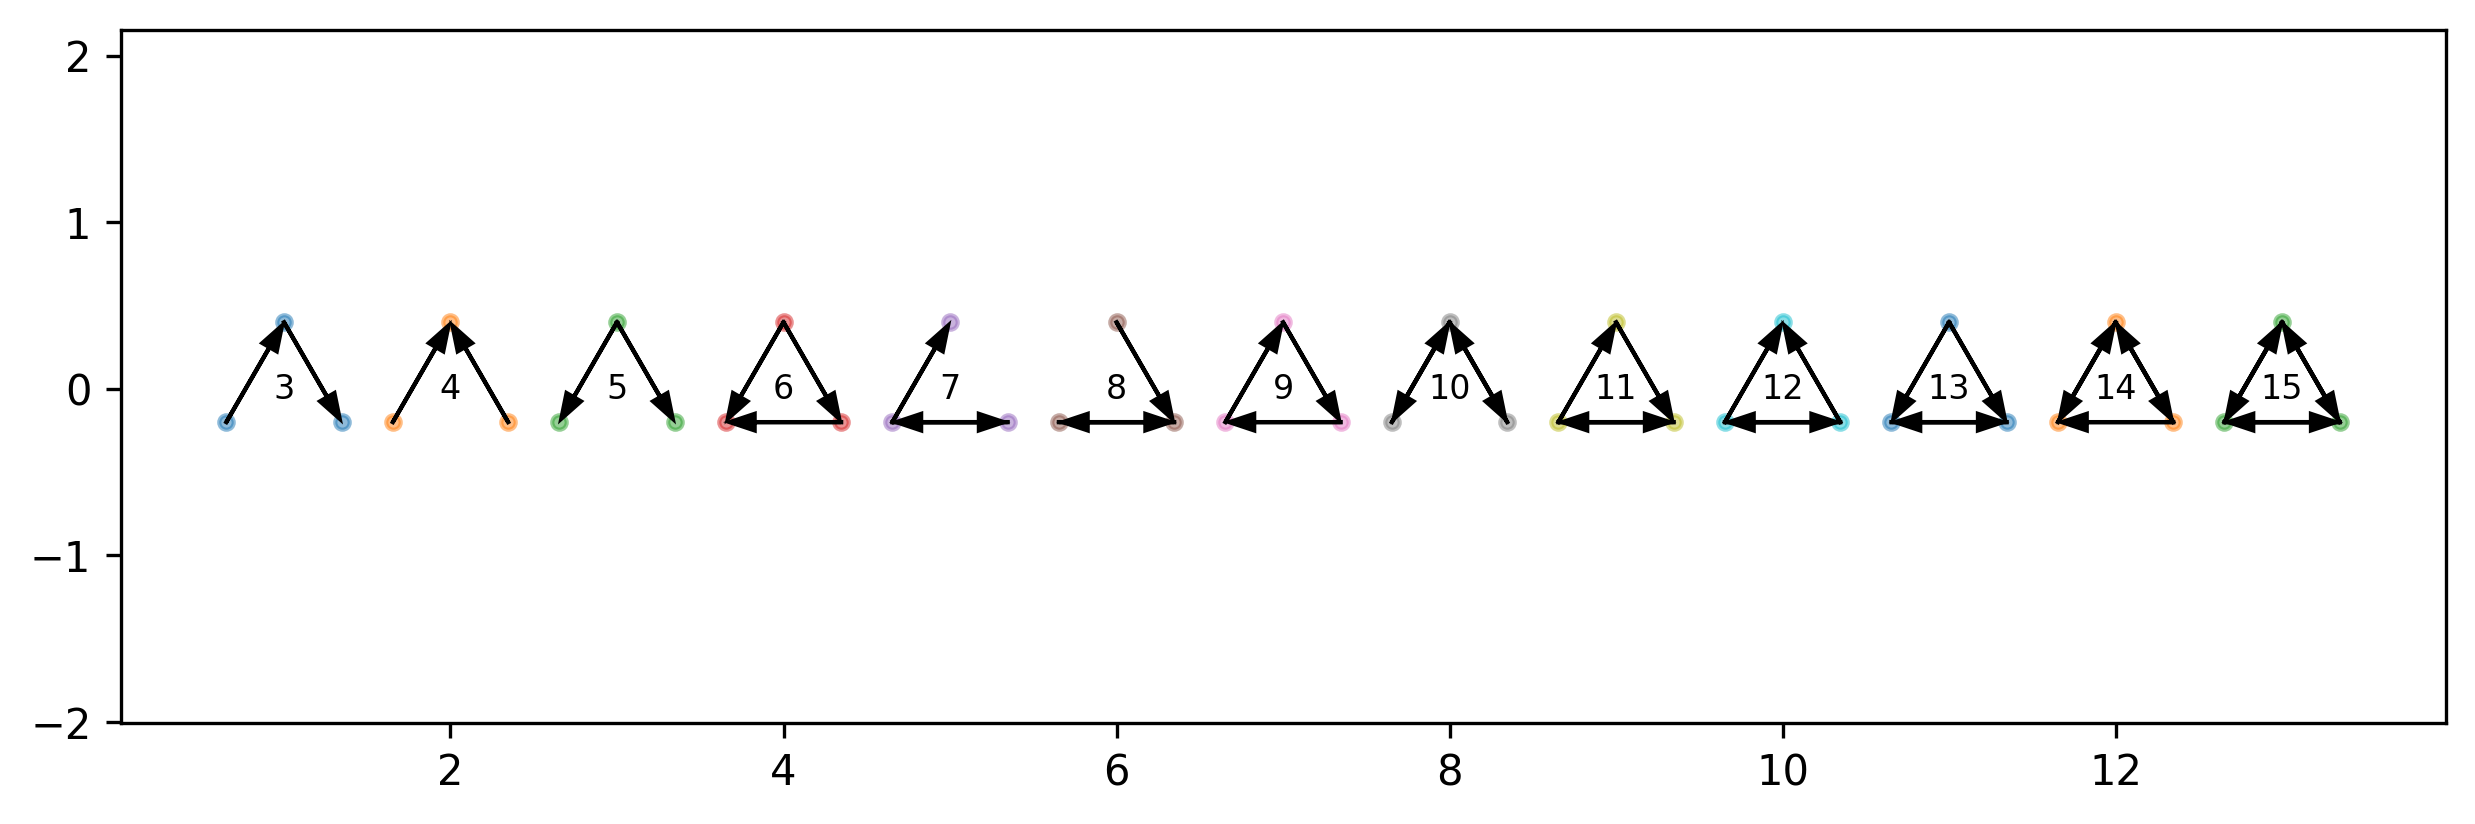

In [8]:
plt.figure(figsize=(10, 3), dpi=300)
nsv.plot_all_triads(ax=plt.gca())

## Analytical solution for Erdős–Rényi model

The mean frequencies of triads in an Erdős–Rényi model can be computed analytically.

Counting motifs..
Plotting..
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<Axes: >, <Axes: >]

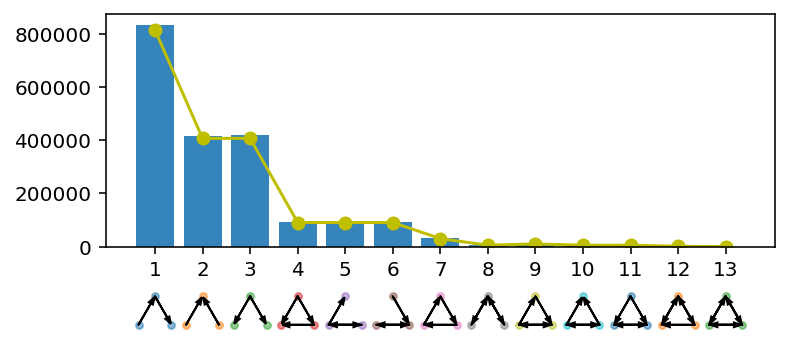

In [9]:
from scipy.special import comb

C3n = comb(n, 3)
f_analytic = C3n * nsm.triad_proba(p)

print("Counting motifs..")
f = nsm.motifs(A)

print("Plotting..")
nsv.bar_motifs(f, f_analytic)

## Extra

For instance, the convention used in [Rubinov and Sporns (2010)](http://dx.doi.org/10.1016/j.neuroimage.2009.10.003):

[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


[<Axes: title={'center': 'Brain Connectivity Toolbox (BCT) triad order'}>,
 <Axes: >]

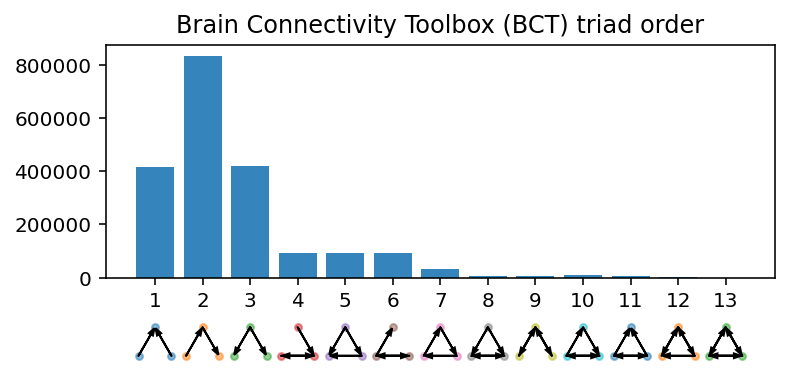

In [10]:
nsv.bar_motifs(
    f, order=nsm.triad_order_bct, title="Brain Connectivity Toolbox (BCT) triad order"
)

## References
* Gal, London, Globerson, Ramaswamy, Reimann, Muller, Markram, and Segev. (2017). [Rich cell-type-specific network topology in neocortical microcircuitry](http://www.rdcu.be/tffO). *Nat Neurosci*, **20(7)**, 1004–1013. http://dx.doi.org/10.1038/nn.4576
* Itzhack, Mogilevski, and Louzoun. (2007). An optimal algorithm for counting network motifs. *Physica A: Statistical Mechanics and Its Applications*, **381**, 482–490. https://doi.org/10.1016/j.physa.2007.02.102
* Rubinov and Sporns. (2010). Complex network measures of brain connectivity: Uses and interpretations. *NeuroImage*, **52(3)**, 1059–1069. https://doi.org/10.1016/j.neuroimage.2009.10.003